<a href="https://colab.research.google.com/github/rimeh00/gomycode/blob/main/randomforrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
up= files.upload()

Saving titanic-passengers.csv to titanic-passengers.csv


In [2]:
df=pd.read_csv('titanic-passengers.csv',sep=";")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(axis=1, columns=['Cabin'], inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [11]:
df.dropna(axis=0, how ='any',thresh= None, inplace= True)

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
import matplotlib.pyplot as plt


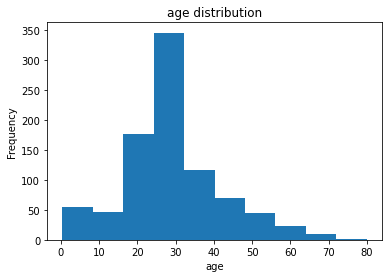

In [15]:
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('number')
df['Age'].plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


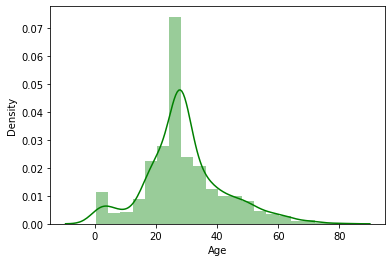

In [16]:
import seaborn as sns
sns.distplot(df['Age'],bins= 20, hist=True, kde= True, color="green")

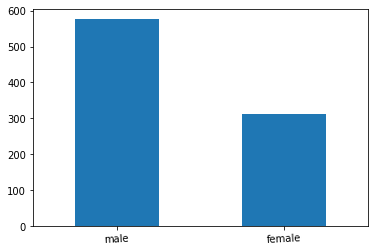

In [17]:
vc= df['Sex'].value_counts()
vc.plot.bar(rot=3)

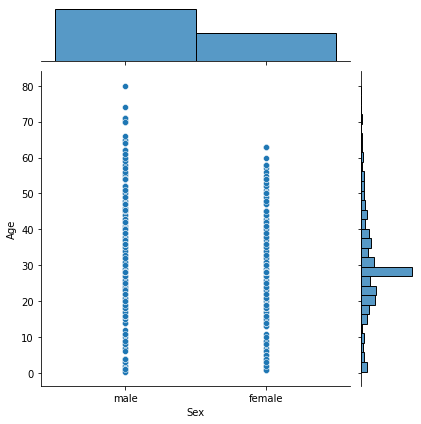

In [18]:
sns.jointplot(y = df['Age'], x = df['Sex'], kind = 'scatter')

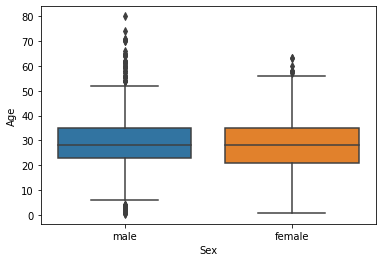

In [19]:
sns.boxplot(y = df['Age'], x = df['Sex'])

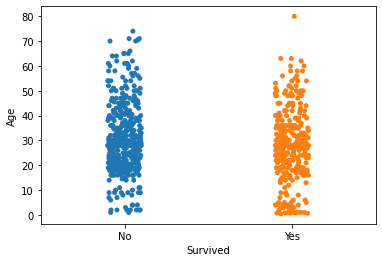

In [20]:
sns.stripplot(y = df['Age'], x = df['Survived'])

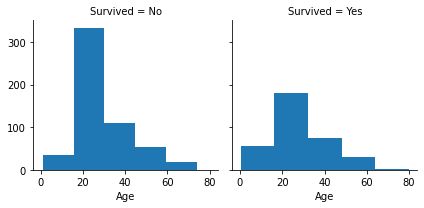

In [21]:
g=sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age',bins= 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

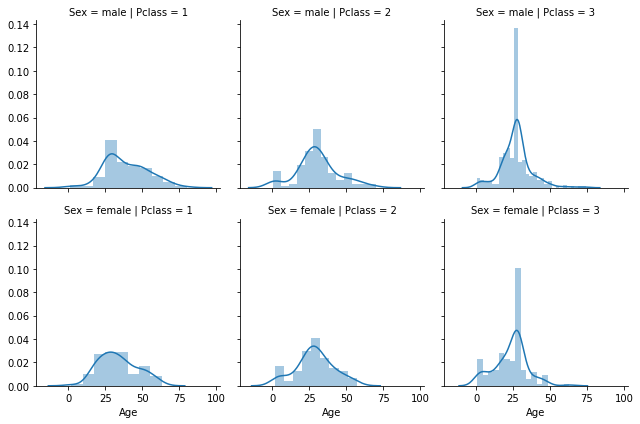

In [22]:
sns.FacetGrid(df, col = 'Pclass', row = 'Sex').map(sns.distplot, 'Age')

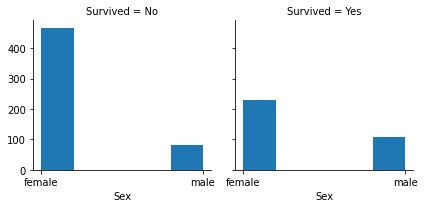

In [23]:
g1=sns.FacetGrid(df, col='Survived')
g1.map(plt.hist, 'Sex', bins=5)

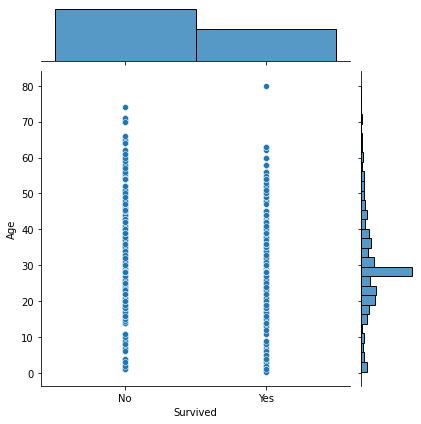

In [24]:
#correlation: survival and age
sns.jointplot(x = df['Survived'], y = df['Age'], kind = 'scatter')

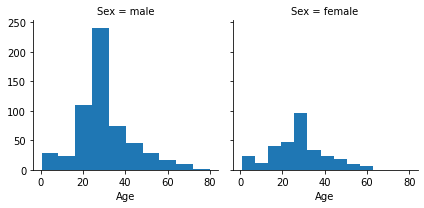

In [25]:
#correlation between sex and age
g1=sns.FacetGrid(df, col='Sex')
g1.map(plt.hist, 'Age', bins=10)

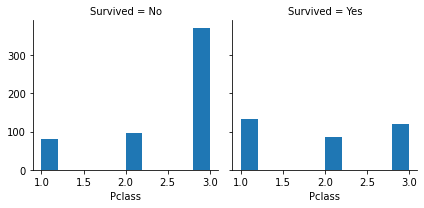

In [26]:
g1=sns.FacetGrid(df, col='Survived')
g1.map(plt.hist, 'Pclass', bins=10)

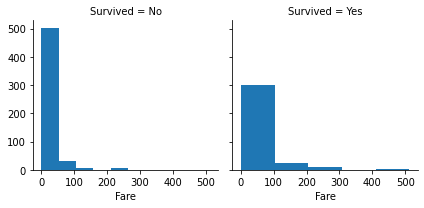

In [27]:
g1=sns.FacetGrid(df, col='Survived')
g1.map(plt.hist, 'Fare', bins=5)

In [28]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

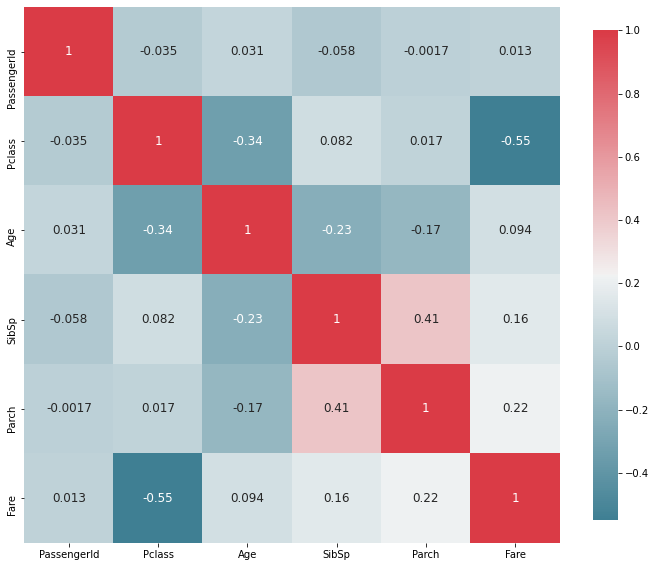

In [29]:
plot_correlation_map(df)

it seems to be a correlation matrix between the seven numerical values present in our dataset. the matrix is articulating information through color intensity, making it easier to read. The color degradation depends on the relation of two features. For example, if we look at the intersection between the columns  “Parch”  and  “Sibsp”, almost the half of passengers were related and they were traveling with a family number.We can use this matrix to explore and define all related features.

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])

In [31]:
df.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.742991,0.626168,36.688879,0.420561,0.359813,84.193516
2,445.956522,0.472826,29.765380,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.932627,0.615071,0.393075,13.675550


In [32]:
df_without_names= df.drop(axis=1, columns=['Name'], inplace= False)

In [33]:
def extraction(chain):
  chain1=str(chain)
  ch= chain1.split(",")
  d=ch[1]
  d1=d.split(".")
  title=d1[0]
  return (title)
  



In [34]:
extraction("Cacic, Miss. Marija")

' Miss'

In [35]:
title= df['Name'].apply(extraction)

In [36]:
title

0         Mr
1         Mr
2         Mr
3        Mrs
4         Mr
       ...  
886      Mrs
887       Mr
888     Miss
889       Mr
890     Miss
Name: Name, Length: 889, dtype: object

In [37]:
df['title']=title

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


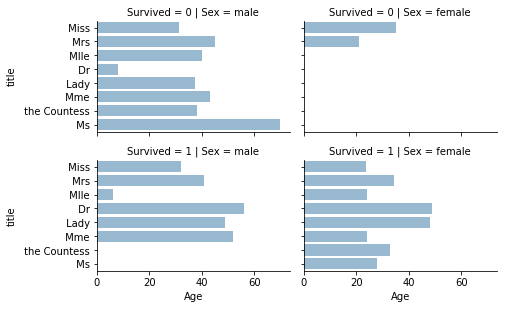

In [39]:
grid= sns.FacetGrid(df, row='Survived', col='Sex', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Age', 'title', alpha=0.5,ci=None)
grid.add_legend()

In [40]:
Title_Dictionary = {

                    "Capt":"Officer",

                    "Col":"Officer",

                    "Major":"Officer",

                      "Dr":"Officer",

                    "Rev":"Officer",

                    "Jonkheer":"Royalty",

                    "Don":"Royalty",

                    "Sir" :"Royalty",

                   "Lady" :"Royalty",

                  "the Countess":"Royalty",

                    "Dona":"Royalty",

                    "Mme":"Miss",

                    "Mlle":"Miss",

                    "Miss" :"Miss",

                    "Ms":"Mrs",

                    "Mr" :"Mrs",

                    "Mrs" :"Mrs",

                    "Master" :"Master"

                    }
df['title']=df['title'].str.strip()
df["title"].replace(Title_Dictionary, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,Mrs
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S,Mrs


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


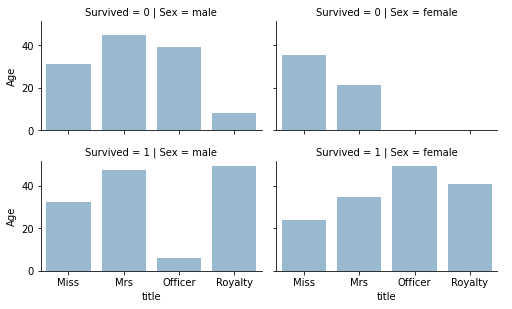

In [41]:
grid= sns.FacetGrid(df, row='Survived', col='Sex', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'title', 'Age', alpha=0.5,ci=None)
grid.add_legend()

In [42]:
df['Familiysize'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Familiysize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,Mrs,0
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,Miss,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S,Mrs,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


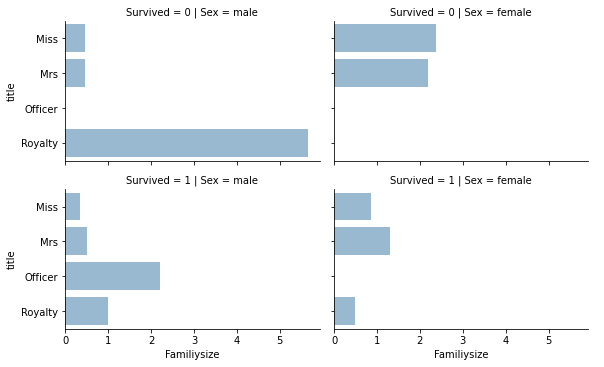

In [43]:
grid= sns.FacetGrid(df, row='Survived', col='Sex', height=2.6, aspect=1.6)
grid.map(sns.barplot, 'Familiysize', 'title', alpha=0.5,ci=None)
grid.add_legend()

In [44]:
 # replacing Sex colomn with numirical features
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)

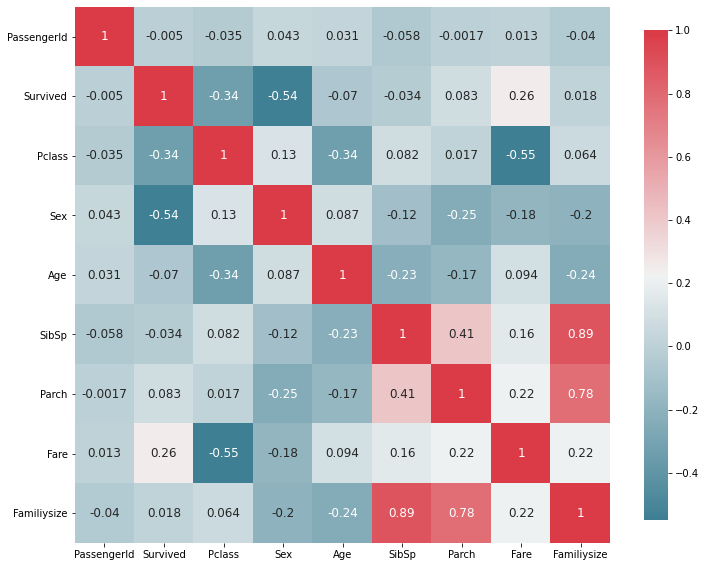

In [45]:
# visualising the correlations with our data's new features: fimilysize and title
plot_correlation_map(df)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [51]:
x=df.drop(["Survived", "Name", "Ticket", "Embarked","PassengerId","title","Sex"], axis=1)
y= df["Survived"]

In [52]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
# applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(263.68873467302456, 266.36400000000003, 'Fare <= 10.817\ngini = 0.471\nsamples = 711\nvalue = [441, 270]\nclass = no D'),
 Text(72.83838555858311, 255.49200000000002, 'Age <= 18.5\ngini = 0.323\nsamples = 306\nvalue = [244, 62]\nclass = no D'),
 Text(18.245231607629428, 244.62, 'Fare <= 7.175\ngini = 0.469\nsamples = 32\nvalue = [20, 12]\nclass = no D'),
 Text(15.204359673024523, 233.74800000000002, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no D'),
 Text(21.286103542234333, 233.74800000000002, 'Parch <= 1.5\ngini = 0.485\nsamples = 29\nvalue = [17, 12]\nclass = no D'),
 Text(18.245231607629428, 222.876, 'SibSp <= 0.5\ngini = 0.477\nsamples = 28\nvalue = [17, 11]\nclass = no D'),
 Text(15.204359673024523, 212.00400000000002, 'Fare <= 7.623\ngini = 0.493\nsamples = 25\nvalue = [14, 11]\nclass = no D'),
 Text(12.163487738419619, 201.132, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes D'),
 Text(18.245231607629428, 201.132, 'Age <= 1.21\ngini = 0.463\nsamples = 22\nval

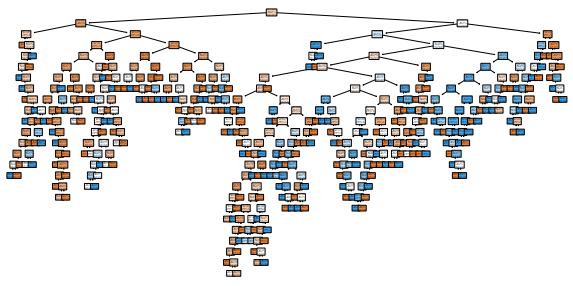

In [58]:
# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree1, filled= True, rounded= True, class_names= ["no D", "yes D"], feature_names= x.columns)

In [61]:
from sklearn.metrics import classification_report
def model_performance (x, y, y_pred):
  accuracy=print('score:{}'.format(accuracy_score(y, y_pred)))
  classy = print(classification_report(y,y_pred))
  confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
  viz= sns.heatmap(confusion_matrix, annot=True)
  return accuracy, classy, viz

score:0.9578059071729957
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       441
           1       0.98      0.91      0.94       270

    accuracy                           0.96       711
   macro avg       0.96      0.95      0.95       711
weighted avg       0.96      0.96      0.96       711



(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f4ab754e450>)

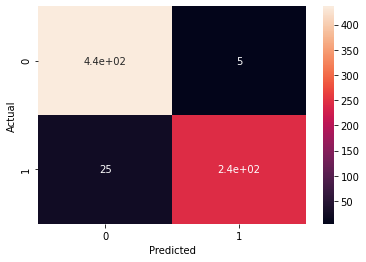

In [62]:
#performance on training set
y_pred1=tree1.predict(x_train)
model_performance(x_train, y_train, y_pred1)

score:0.6741573033707865
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       108
           1       0.59      0.57      0.58        70

    accuracy                           0.67       178
   macro avg       0.66      0.66      0.66       178
weighted avg       0.67      0.67      0.67       178



(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f4abc9e1150>)

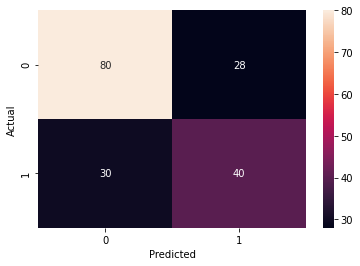

In [63]:
# performance on testing set
y_pred=tree1.predict(x_test)   # evaluating our model
model_performance(x_test, y_test, y_pred)

In [64]:
# pruning
dtree= tree.DecisionTreeClassifier(criterion ='gini', splitter ='random',max_leaf_nodes = 15, min_samples_leaf = 7, max_depth=5)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

score:0.702247191011236
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       108
           1       0.68      0.46      0.55        70

    accuracy                           0.70       178
   macro avg       0.70      0.66      0.66       178
weighted avg       0.70      0.70      0.69       178



(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f4ab721d3d0>)

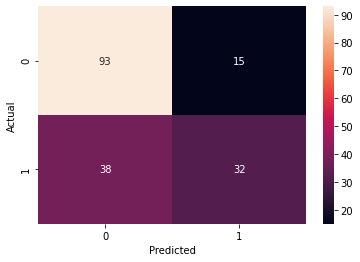

In [65]:
y_pred= dtree.predict(x_test)
model_performance(x_test, y_test, y_pred)

slight amelioration of the model's performance

In [66]:
#using random forrest model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  
y_predd=clf.predict(x_test)

score:0.6853932584269663
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       108
           1       0.60      0.59      0.59        70

    accuracy                           0.69       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.68      0.69      0.68       178



(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f4ab71bb890>)

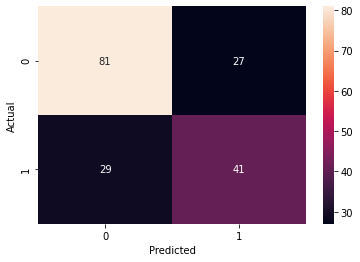

In [67]:
model_performance(x_test, y_test, y_predd)


In [68]:
#changing the estimator's number
clf=RandomForestClassifier(n_estimators=12) 
clf.fit(x_train, y_train)  
y_predd=clf.predict(x_test)  

score:0.6797752808988764
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       108
           1       0.59      0.59      0.59        70

    accuracy                           0.68       178
   macro avg       0.66      0.66      0.66       178
weighted avg       0.68      0.68      0.68       178



(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f4ab6e21590>)

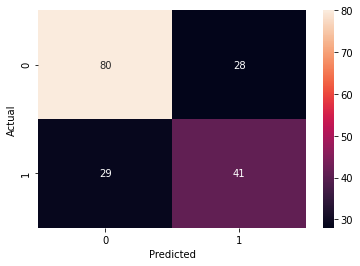

In [69]:
model_performance(x_test, y_test, y_predd)

the decision tree model seems to be the best model fitting this dataset, maybe because the dataset is not large so it doesn't require a very strong model